### Instructor Feedback

It seems you are not very comfortable with the notebook format. In particular, with 
writing markdown cells with explanations in english. The code is here in service of the explanation, not the other way around.

Having explanations as comments in the code and printing out large tables does not help.

No Extra Credit

In [1]:

# coding: utf-8

# In[ ]:

# Name: Ankit Singh
# Email: ans049@eng.ucsd.edu
# PID: A53097552


# In[1]:

get_ipython().magic(u'pwd')
get_ipython().magic(u'pylab inline')


# In[2]:

data_dir = "./Data/Weather/"
get_ipython().magic(u'matplotlib inline')
get_ipython().system(u'mkdir -p $data_dir')
get_ipython().system(u'ls $data_dir')


# In[3]:

import pickle
Data=pickle.load(open('./Data/Weather/SampleStations.pickle','r'))
STAT,STAT_description=pickle.load(open('./Data/Weather/STAT.pickle','r'))


# In[65]:

def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)


# In[4]:

FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)


# In[5]:

import pandas as pd

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]
    m_df[m]=t_df    


Populating the interactive namespace from numpy and matplotlib
STAT.pickle                 ghcnd-stations.txt
SampleStations.pickle       ghcnd-stations_buffered.txt
data-source.txt             ghcnd-version.txt
ghcnd-readme.txt            stations.pkl


In [2]:
# When trying to explain the drop in counts for SNWD/TMAX at end of every month , I looked at the measuremnts of every station for TMAX. 
# Repalced all NANs with 0 , and valid measurements with 1s and added them together to give a detail of valid counts perday per station.
# Out of this dataset one can find the stations that see a constant drop in counts at the end of every month over 12 months and can weed them out to improve our data .

# In[424]:

dataframe = m_df['TMAX']
dataframe = dataframe.fillna(0)
num = dataframe._get_numeric_data()
num[num < 0] = 1
num[num > 0] = 1
station_matrix = dataframe.groupby('station')
station_matrix = station_matrix.aggregate(np.sum)
station_matrix

,year,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
station,,,,,,,,,,,,,,,,,,,,,
CA001047670,16.0,14.0,14.0,14.0,14.0,13.0,15.0,14.0,14.0,14.0,...,14.0,14.0,14.0,13.0,12.0,13.0,12.0,13.0,14.0,14.0
CA001103324,22.0,20.0,18.0,17.0,19.0,20.0,19.0,19.0,20.0,20.0,...,21.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
CA001124110,72.0,65.0,68.0,64.0,66.0,65.0,68.0,64.0,65.0,64.0,...,64.0,66.0,68.0,63.0,63.0,64.0,63.0,63.0,66.0,66.0
CA003057K55,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
CA004039000,58.0,49.0,49.0,49.0,49.0,50.0,48.0,48.0,47.0,49.0,...,48.0,49.0,49.0,48.0,47.0,46.0,49.0,49.0,49.0,46.0
CA005021848,91.0,83.0,84.0,83.0,83.0,86.0,84.0,85.0,83.0,81.0,...,81.0,84.0,84.0,84.0,82.0,82.0,86.0,86.0,85.0,80.0
CA005022603,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0
CA005023265,11.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
CA006100720,22.0,20.0,20.0,21.0,21.0,20.0,21.0,19.0,19.0,21.0,...,21.0,21.0,20.0,20.0,21.0,21.0,21.0,19.0,21.0,20.0


In [3]:

# In[425]:

stationname = np.matrix(m_df['TMAX'].iloc[:,:1])


# In[426]:

stationname = np.asarray(stationname).reshape(-1)


# In[427]:

stationname = list(set(stationname))


# In[428]:

station_matrix = np.matrix(station_matrix.iloc[:,1:])


# In[429]:

print shape(station_matrix)
len(stationname)

(195, 365)


195

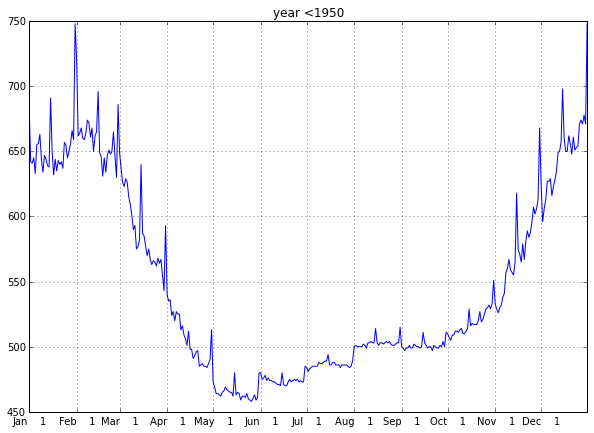

In [4]:


# In[430]:

station_array = np.asarray(station_matrix)


# In[457]:

dates2 = [14,30,44,58,79,89,99,119,129,150,164,180,199,211,229,242,249,272,289,303,319,333,339,364]


# In[464]:

station_array2 = station_array[:,dates2]


# The stations with most differnece -tive between the counts of end of month and middle of months across all 12 months can be considered as culprits and removed .
# 

# In[ ]:




# When analysisng for the SNOW depth , found that actually before 1950 the trend was slightly opposite with peaks 
# being seen  in data at end and middle of month also there are more counts at the start and end of a year.
# Suggesting that many stations used to take measurement monthly.
# Also more measurements were taken when it actually snowed in most of america ,(around start and end of year).
# 
# Maybe the concept of holiday season began to gain traction after 1950s which started the reversal in trends.

# In[419]:

matrix3 = np.matrix(m_df['SNWD'].query('year < 1950' ).iloc[:,3:])


# In[420]:

matrix3 = 1-np.isnan(matrix3)


# In[421]:

matrix3 = np.sum(matrix3,axis=0)


# In[422]:

YearlyPlots(matrix3.T,ttl='year <1950')



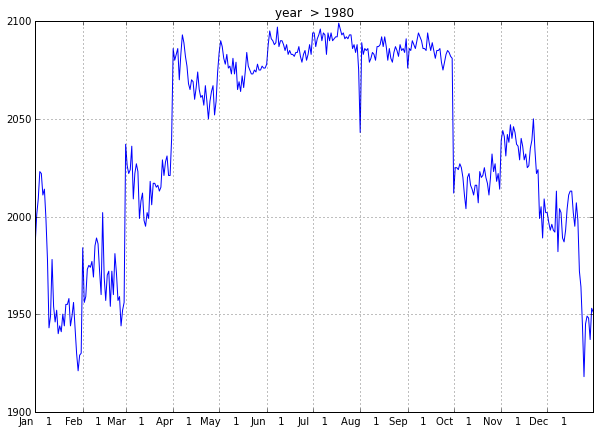

In [5]:

# In[423]:

matrix4 = np.matrix(m_df['SNWD'].query('year > 1980' ).iloc[:,3:])
matrix4 = 1-np.isnan(matrix4)
matrix4 = np.sum(matrix4,axis=0)
YearlyPlots(matrix4.T,ttl='year  > 1980')


# In[ ]: